In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

from src.data_prep.Nifty50Dataset import Nifty50Dataset
from src.forecasting.GaussianTransformer import CustomTransformer
from src.forecasting.StockSeriesForcaster import StockSeriesForecaster

model = CustomTransformer(d_model=4, nhead=2, num_decoder_layers=2, num_encoder_layers=2, dim_feedforward=64)

dataset = Nifty50Dataset(
    "/Users/maniksomayaji/Documents/omscs/capstone_project/data/NIFTY 50_minute_data.csv",
    window_size=300,
    prediction_horizon=1
)

val_ratio = 0.2
val_size = int(len(dataset) * val_ratio)
train_size = len(dataset) - val_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

forecaster = StockSeriesForecaster(model, optimizer, criterion)


[Epoch 1 | Batch 50] Loss: 1.0540
[Epoch 1 | Batch 100] Loss: 0.0755
[Epoch 1 | Batch 150] Loss: 7.0236
[Epoch 1 | Batch 200] Loss: 0.1838
[Epoch 1 | Batch 250] Loss: 0.5693
[Epoch 1 | Batch 300] Loss: 1.3639
[Epoch 1 | Batch 350] Loss: 2.6977
[Epoch 1 | Batch 400] Loss: 0.0077
[Epoch 1 | Batch 450] Loss: 0.0976
[Epoch 1 | Batch 500] Loss: 2.0549
[Epoch 1 | Batch 550] Loss: 0.9697
[Epoch 1 | Batch 600] Loss: 0.3175
[Epoch 1 | Batch 650] Loss: 2.4835
[Epoch 1 | Batch 700] Loss: 0.1308
[Epoch 1 | Batch 750] Loss: 0.0500
[Epoch 1 | Batch 800] Loss: 0.1820
[Epoch 1 | Batch 850] Loss: 0.0550
[Epoch 1 | Batch 900] Loss: 0.4215
[Epoch 1 | Batch 950] Loss: 2.0538
[Epoch 1 | Batch 1000] Loss: 1.3184
[Epoch 1 | Batch 1050] Loss: 0.4642
[Epoch 1 | Batch 1100] Loss: 0.3368
[Epoch 1 | Batch 1150] Loss: 0.1641
[Epoch 1 | Batch 1200] Loss: 0.1572
[Epoch 1 | Batch 1250] Loss: 6.3878
[Epoch 1 | Batch 1300] Loss: 1.5053
[Epoch 1 | Batch 1350] Loss: 0.3878
[Epoch 1 | Batch 1400] Loss: 0.0213
[Epoch 1 | B

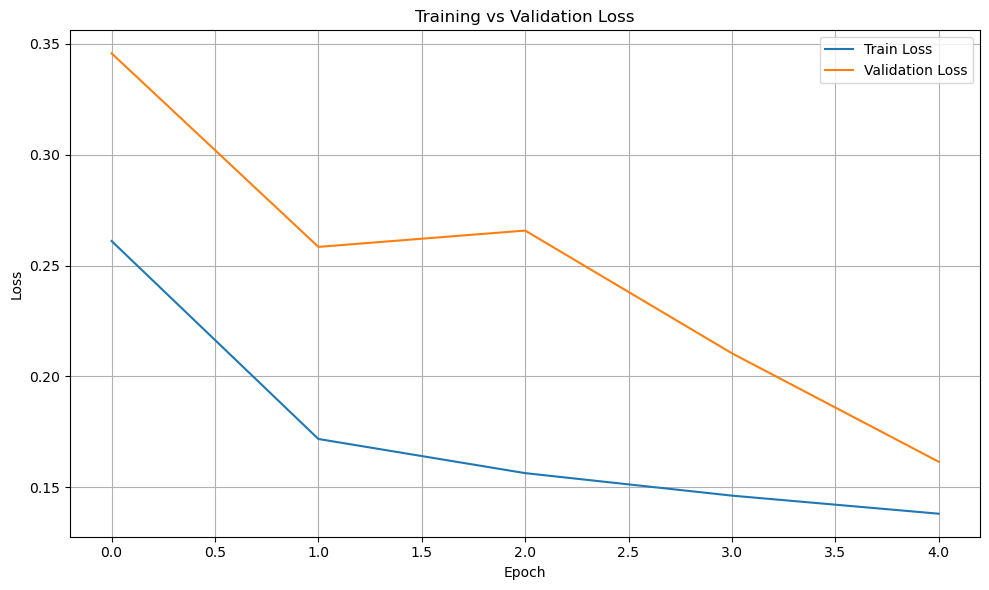

In [2]:
train_loss, val_loss = forecaster.train(train_loader, val_loader, epochs=5)

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
num_batches = 3
for i, (x, y) in enumerate(train_loader):
    if i >= num_batches:
        break
    output = forecaster.autoregressive_predict(x, max_len=20)
    print("Generated:", output)

Generated: tensor([[8731.9834, 8710.2090, 8707.1113, 8707.0664, 8708.5254, 8710.7832,
         8713.2930, 8715.6250, 8717.5723, 8719.0674, 8720.1465, 8720.8467,
         8721.2246, 8721.3105, 8721.1768, 8720.8789, 8720.4971, 8720.1094,
         8719.7578, 8719.4648],
        [7499.0996, 7485.1011, 7484.4727, 7485.3433, 7486.4185, 7487.6191,
         7488.9331, 7490.1934, 7491.2100, 7491.9087, 7492.3169, 7492.5000,
         7492.5420, 7492.5103, 7492.4512, 7492.3975, 7492.3755, 7492.4126,
         7492.5278, 7492.7266]])
Generated: tensor([[7632.2778, 7595.0454, 7616.3647, 7635.8071, 7648.5859, 7657.1011,
         7663.5454, 7669.3013, 7674.8408, 7679.4390, 7682.5991, 7684.1006,
         7684.0708, 7683.0405, 7681.7056, 7680.5923, 7679.9116, 7679.6157,
         7679.5269, 7679.4375],
        [8028.4683, 8042.2676, 8051.6182, 8056.2856, 8058.2061, 8058.6763,
         8058.2705, 8057.2627, 8055.8975, 8054.4438, 8053.1152, 8052.0356,
         8051.2393, 8050.6816, 8050.3008, 8050.0586, 804

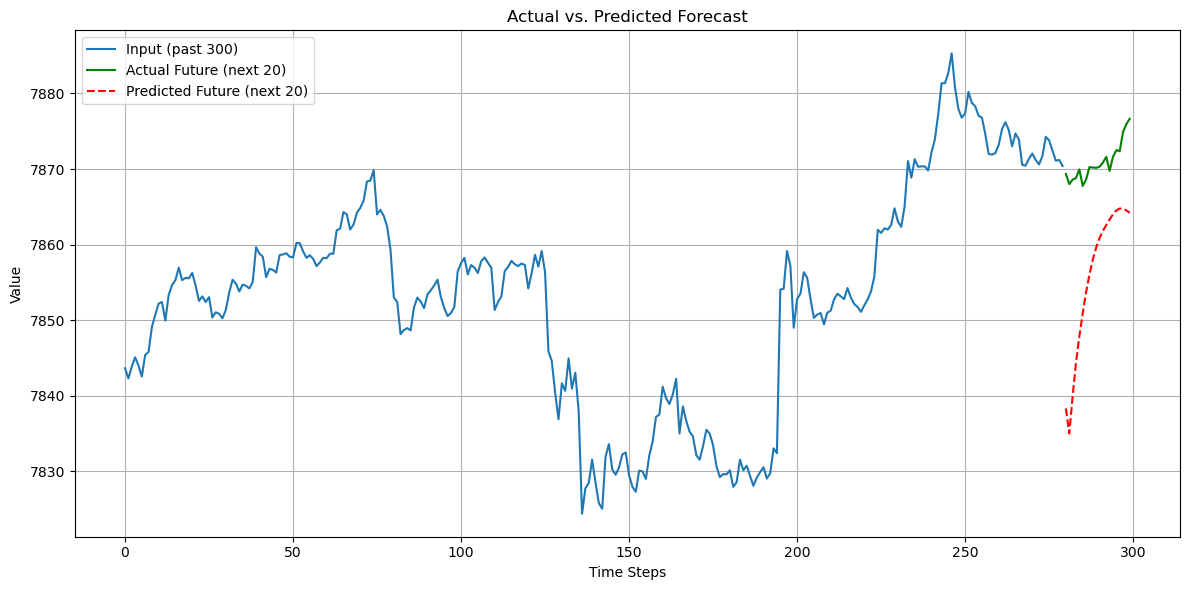

In [14]:
import matplotlib.pyplot as plt
import torch

data_x, data_y = val_dataset[9030]
full_series = data_x[:320]

input_seq = full_series[:280].unsqueeze(0)
true_future = full_series[280:]

with torch.no_grad():
    predicted_future = forecaster.autoregressive_predict(input_seq, max_len=20)
predicted_future = predicted_future.squeeze().unsqueeze(-1) # Remove batch dimension

plt.figure(figsize=(12, 6))
plt.plot(range(280), input_seq.squeeze(), label='Input (past 300)')
plt.plot(range(280, 300), true_future, label='Actual Future (next 20)', color='green')
plt.plot(range(280, 300), predicted_future, label='Predicted Future (next 20)', color='red', linestyle='--')
plt.legend()
plt.title('Actual vs. Predicted Forecast')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
torch.save(model.state_dict(), 'model_l_1.pth')

In [12]:
forecaster1 = StockSeriesForecaster(model, optimizer, criterion)
train_loss, val_loss = forecaster1.train(train_loader, val_loader)

KeyboardInterrupt: 

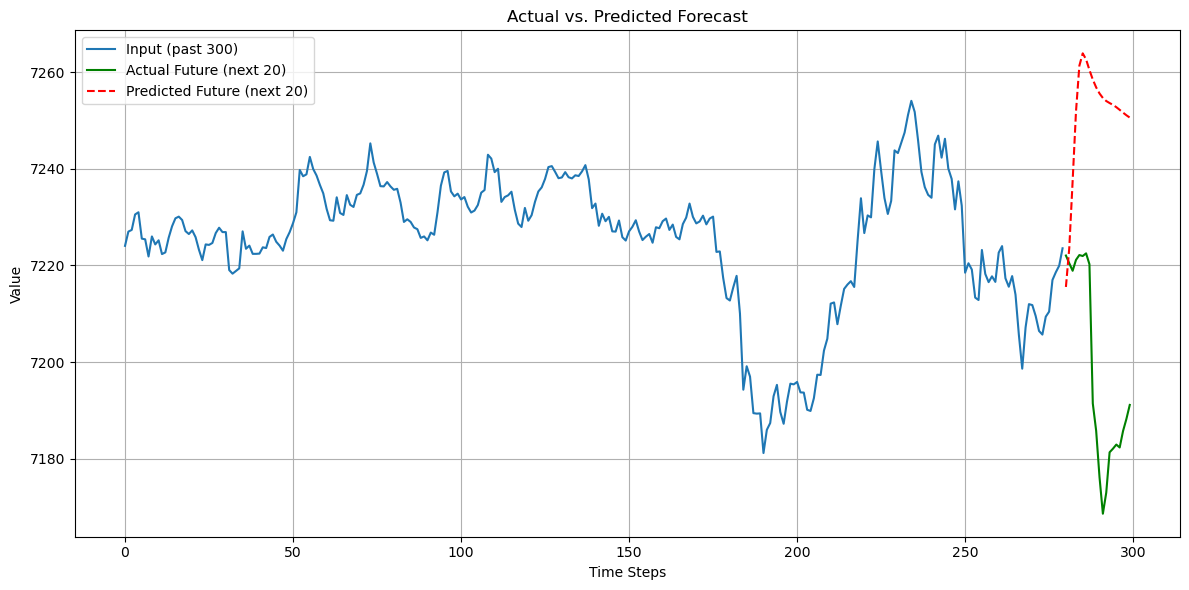